<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_kmeans_walkforward_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `Protocol Buffer Fix (for TensorFlow)'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-firestore 2.20.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.30.2 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5

In [ ]:
!pip install tensorflow

In [ ]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [ ]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

Version Checks
print("Library Versions")
print("--------------------")
print("PyTorch:", torch.__version__)
print("CUDA:", torch.version.cuda)
print("cuDF:", cudf.__version__)
print("cuML:", cuml.__version__)
print("Dask:", dask.__version__)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("LightGBM:", lgb.__version__)
print("Gymnasium:", gym.__version__)
print("Stable Baselines3:", stable_baselines3.__version__)

=========================
GPU Check (Torch + NVIDIA)
=========================
print("\nGPU Availability")
print("--------------------")
print("PyTorch GPU Available:", torch.cuda.is_available())
print("GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))


Library Versions
--------------------
PyTorch: 2.6.0+cu124
CUDA: 12.4
cuDF: 24.12.00
cuML: 24.12.00
Dask: 2024.11.2
Pandas: 2.2.3
NumPy: 2.1.3
SciPy: 1.15.2
LightGBM: 4.5.0
Gymnasium: 1.1.1
Stable Baselines3: 2.6.0

GPU Availability
--------------------
PyTorch GPU Available: True
GPU Count: 1
GPU Name: Tesla T4


In [ ]:
#Core Libraries
import gc
import json
import os
import pickle
import sys
import time
from collections import defaultdict, deque
from datetime import datetime

#Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba
import IPython.display as display

#Machine Learning & Data Processing
import joblib
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler

#Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

#RAPIDS Libraries (cuDF & cuML for GPU acceleration)
import cupy as cp

#Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

#Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit
from gym_anytrading.envs import StocksEnv

#Financial & Stock Data Libraries
import yfinance as yf

#PyTorch Essentials
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
#Set CUDA Paths (Ensuring GPU Utilization)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# ✅ Ticker list
TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

ANALYZE_METHODS = True
anomaly_eval_summary = []

import yfinance as yf
import time

def download_data(ticker, retries=3, sleep_time=5):
    for attempt in range(retries):
        try:
            df = yf.download(ticker, period="720d", interval="1h", progress=False)
            if not df.empty:
                df.reset_index(inplace=True)
                return df
        except Exception as e:
            print(f"⚠️ Error downloading {ticker} (Attempt {attempt + 1}): {e}")
        time.sleep(sleep_time)
    print(f"❌ Failed to download {ticker} after {retries} attempts.")
    return None



In [ ]:
#Utility Functions

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]


def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))


def compute_technical_indicators(df):
    """
    Applies technical indicators including RSI, MACD, Bollinger Bands, Stochastic Oscillator,
    OBV, CCI, momentum, trend, and volatility indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100

    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df


def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError("'Close' column is missing. Cannot generate trade labels.")

    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(
        df['Price_Change'] > buy_threshold, 1,
        np.where(df['Price_Change'] < sell_threshold, -1, 0)
    )

    df.dropna(inplace=True)
    return df


def drop_low_importance_features(df, feature_importance_df, threshold=1.0):
    """
    Drops low-importance features based on a given threshold.
    """
    low_importance_features = feature_importance_df[
        feature_importance_df['importance'] < threshold
    ]['feature'].tolist()

    if low_importance_features:
        df.drop(columns=low_importance_features, inplace=True)
        print(f"Dropped low-importance features: {low_importance_features}")
    else:
        print("No low-importance features found to drop.")

    return df


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as SKLearnKMeans

# ✅ Try to import cuML KMeans
try:
    from cuml.cluster import KMeans as cuKMeans
    USE_CUML = True
except:
    print("cuML not available. Falling back to scikit-learn KMeans.")
    USE_CUML = False

def walkforward_kmeans(df, n_clusters=3, test_size=0.2):
    df = df.copy()
    split_idx = int(len(df) * (1 - test_size))
    train_df = df.iloc[:split_idx].copy()   # ✅ Avoid view warnings
    test_df = df.iloc[split_idx:].copy()    # ✅ Avoid view warnings

    # Normalize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[['RSI', 'MACD', 'OBV']])
    X_test = scaler.transform(test_df[['RSI', 'MACD', 'OBV']])

    # Cluster
    kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    test_df['cluster'] = kmeans.predict(X_test)

    # Map clusters to signals
    cluster_perf = test_df.groupby('cluster')['Close'].mean().sort_values()
    cluster_signal = {cluster: signal for cluster, signal in zip(cluster_perf.index, [1, 0, -1])}
    test_df['signal'] = test_df['cluster'].map(cluster_signal)

    # Strategy backtest
    test_df['return'] = test_df['Close'].pct_change().fillna(0)
    test_df['strategy'] = test_df['signal'].shift(1).fillna(0) * test_df['return']
    test_df['cumulative_market'] = (1 + test_df['return']).cumprod()
    test_df['cumulative_strategy'] = (1 + test_df['strategy']).cumprod()

    return {
        "Final Market": test_df['cumulative_market'].iloc[-1],
        "Final Strategy": test_df['cumulative_strategy'].iloc[-1],
        "Sharpe": test_df['strategy'].mean() / (test_df['strategy'].std() + 1e-6) * np.sqrt(252),
        "Drawdown": (test_df['cumulative_strategy'].cummax() - test_df['cumulative_strategy']).max()
    }, test_df

#Run full loop
summary = []
for ticker in TICKERS:
    print(f"{ticker}")
    df = download_data(ticker)
    if df is None or df.empty or len(df) < 100:
        continue
    df = compute_technical_indicators(df)
    stats, result_df = walkforward_kmeans(df)
    stats['Ticker'] = ticker
    summary.append(stats)

#Save & Display Summary
summary_df = pd.DataFrame(summary)
os.makedirs("results/kmeans_walkforward", exist_ok=True)
summary_df.to_csv("results/kmeans_walkforward/summary.csv", index=False)
print("\nSummary saved: results/kmeans_walkforward/summary.csv")
print(summary_df.sort_values('Final Strategy', ascending=False).head())


AAPL
TSLA
MSFT
GOOGL
AMZN
NVDA
META
BRK-B
JPM
JNJ
XOM
V
PG
UNH
MA
HD
LLY
MRK
PEP
KO
BAC
ABBV
AVGO
PFE
COST
CSCO
TMO
ABT
ACN
WMT
MCD
ADBE
DHR
CRM
NKE
INTC
QCOM
NEE
AMD
TXN
AMGN
UPS
LIN
PM
UNP
BMY
LOW
RTX
CVX
IBM
GE
SBUX
ORCL

Summary saved: results/kmeans_walkforward/summary.csv
    Final Market  Final Strategy    Sharpe  Drawdown Ticker
26      0.703525        1.332839  0.797733  0.215124    TMO
17      0.652022        1.266163  0.832793  0.177673    MRK
36      0.780621        1.219721  0.610559  0.166782   QCOM
1       0.990568        1.214999  0.373375  0.360301   TSLA
22      1.043312        1.111058  0.327837  0.193363   AVGO


In [ ]:
summary = []
top_portfolios = {}

for ticker in TICKERS:
    print(f"\n📊 Processing {ticker}")
    df = download_data(ticker)
    if df is None or df.empty or len(df) < 100:
        continue

    df = compute_technical_indicators(df)
    stats, result_df = walkforward_kmeans(df)

    # ✅ Add Forward Return and dynamic signal mapping
    result_df['Forward_Return'] = result_df['Close'].pct_change(periods=10).shift(-10)
    cluster_returns = result_df.groupby('cluster')['Forward_Return'].mean().sort_values(ascending=False)
    labels = ['Buy', 'Hold', 'Sell']
    signal_map = {cluster: labels[i] if i < len(labels) else 'Hold' for i, cluster in enumerate(cluster_returns.index)}
    result_df['signal'] = result_df['cluster'].map(signal_map)

    # ✅ Simulate trading
    initial_balance = 100000
    balance = initial_balance
    position = 0
    portfolio_values = []

    for i in range(len(result_df)):
        price = result_df.iloc[i]['Close']
        signal = result_df.iloc[i]['signal']
        if signal == 'Buy' and balance > 0:
            position = balance / price
            balance = 0
        elif signal == 'Sell' and position > 0:
            balance = position * price
            position = 0
        portfolio_values.append(balance if balance > 0 else position * price)

    result_df['Portfolio_Value'] = portfolio_values
    final_portfolio_value = portfolio_values[-1]

    # ✅ Save result and collect stats
    stats['Ticker'] = ticker
    stats['Final Portfolio Value'] = final_portfolio_value
    stats['Signal Map'] = signal_map
    summary.append(stats)

    # ✅ Optionally store for visualization (top 5 only)
    top_portfolios[ticker] = result_df[['Portfolio_Value']].copy()

    # ✅ Save individual result
    result_df.to_csv(f"results/kmeans_walkforward/{ticker}_walkforward.csv", index=False)

# ✅ Save full summary
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values('Final Portfolio Value', ascending=False)
summary_df.to_csv("results/kmeans_walkforward/summary_forward_return_remap.csv", index=False)

print("\n✅ Summary with forward return signal mapping saved.")
print(summary_df[['Ticker', 'Final Strategy', 'Final Portfolio Value', 'Sharpe', 'Drawdown']].head())



📊 Processing AAPL

📊 Processing TSLA

📊 Processing MSFT

📊 Processing GOOGL

📊 Processing AMZN

📊 Processing NVDA

📊 Processing META

📊 Processing BRK-B

📊 Processing JPM

📊 Processing JNJ

📊 Processing XOM

📊 Processing V

📊 Processing PG

📊 Processing UNH

📊 Processing MA

📊 Processing HD

📊 Processing LLY

📊 Processing MRK

📊 Processing PEP

📊 Processing KO

📊 Processing BAC

📊 Processing ABBV

📊 Processing AVGO

📊 Processing PFE

📊 Processing COST

📊 Processing CSCO

📊 Processing TMO

📊 Processing ABT

📊 Processing ACN

📊 Processing WMT

📊 Processing MCD

📊 Processing ADBE

📊 Processing DHR

📊 Processing CRM

📊 Processing NKE

📊 Processing INTC

📊 Processing QCOM

📊 Processing NEE

📊 Processing AMD

📊 Processing TXN

📊 Processing AMGN

📊 Processing UPS

📊 Processing LIN

📊 Processing PM

📊 Processing UNP

📊 Processing BMY

📊 Processing LOW

📊 Processing RTX

📊 Processing CVX

📊 Processing IBM

📊 Processing GE

📊 Processing SBUX

📊 Processing ORCL

✅ Summary with forward return sig

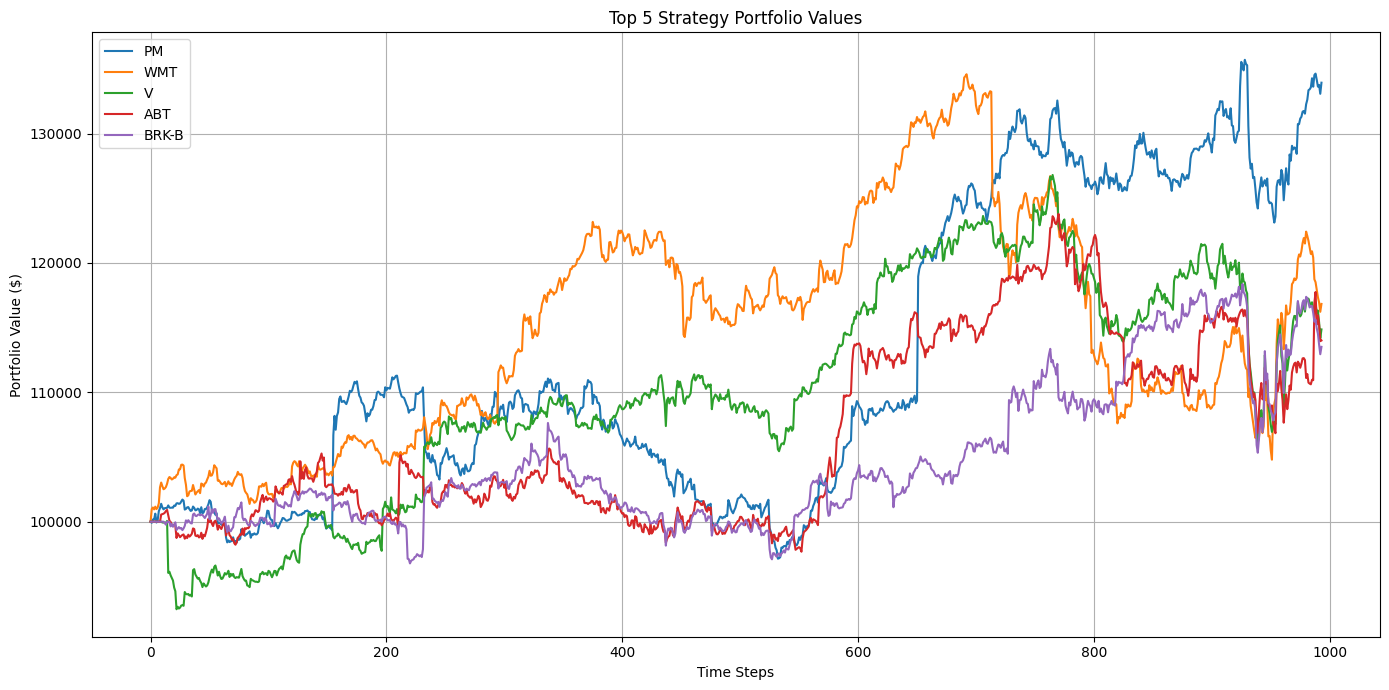

In [ ]:
# ✅ Plot Top 5 Strategy Portfolio Values
plt.figure(figsize=(14, 7))
for ticker in summary_df.head(5)['Ticker']:
    plt.plot(top_portfolios[ticker].values, label=ticker)

plt.title("Top 5 Strategy Portfolio Values")
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


⚠️ Result CSV not found for TMO: results/kmeans_walkforward/data/TMO_result.csv
⚠️ Result CSV not found for MRK: results/kmeans_walkforward/data/MRK_result.csv
⚠️ Result CSV not found for QCOM: results/kmeans_walkforward/data/QCOM_result.csv
⚠️ Result CSV not found for TSLA: results/kmeans_walkforward/data/TSLA_result.csv
⚠️ Result CSV not found for AVGO: results/kmeans_walkforward/data/AVGO_result.csv
📈 TMO


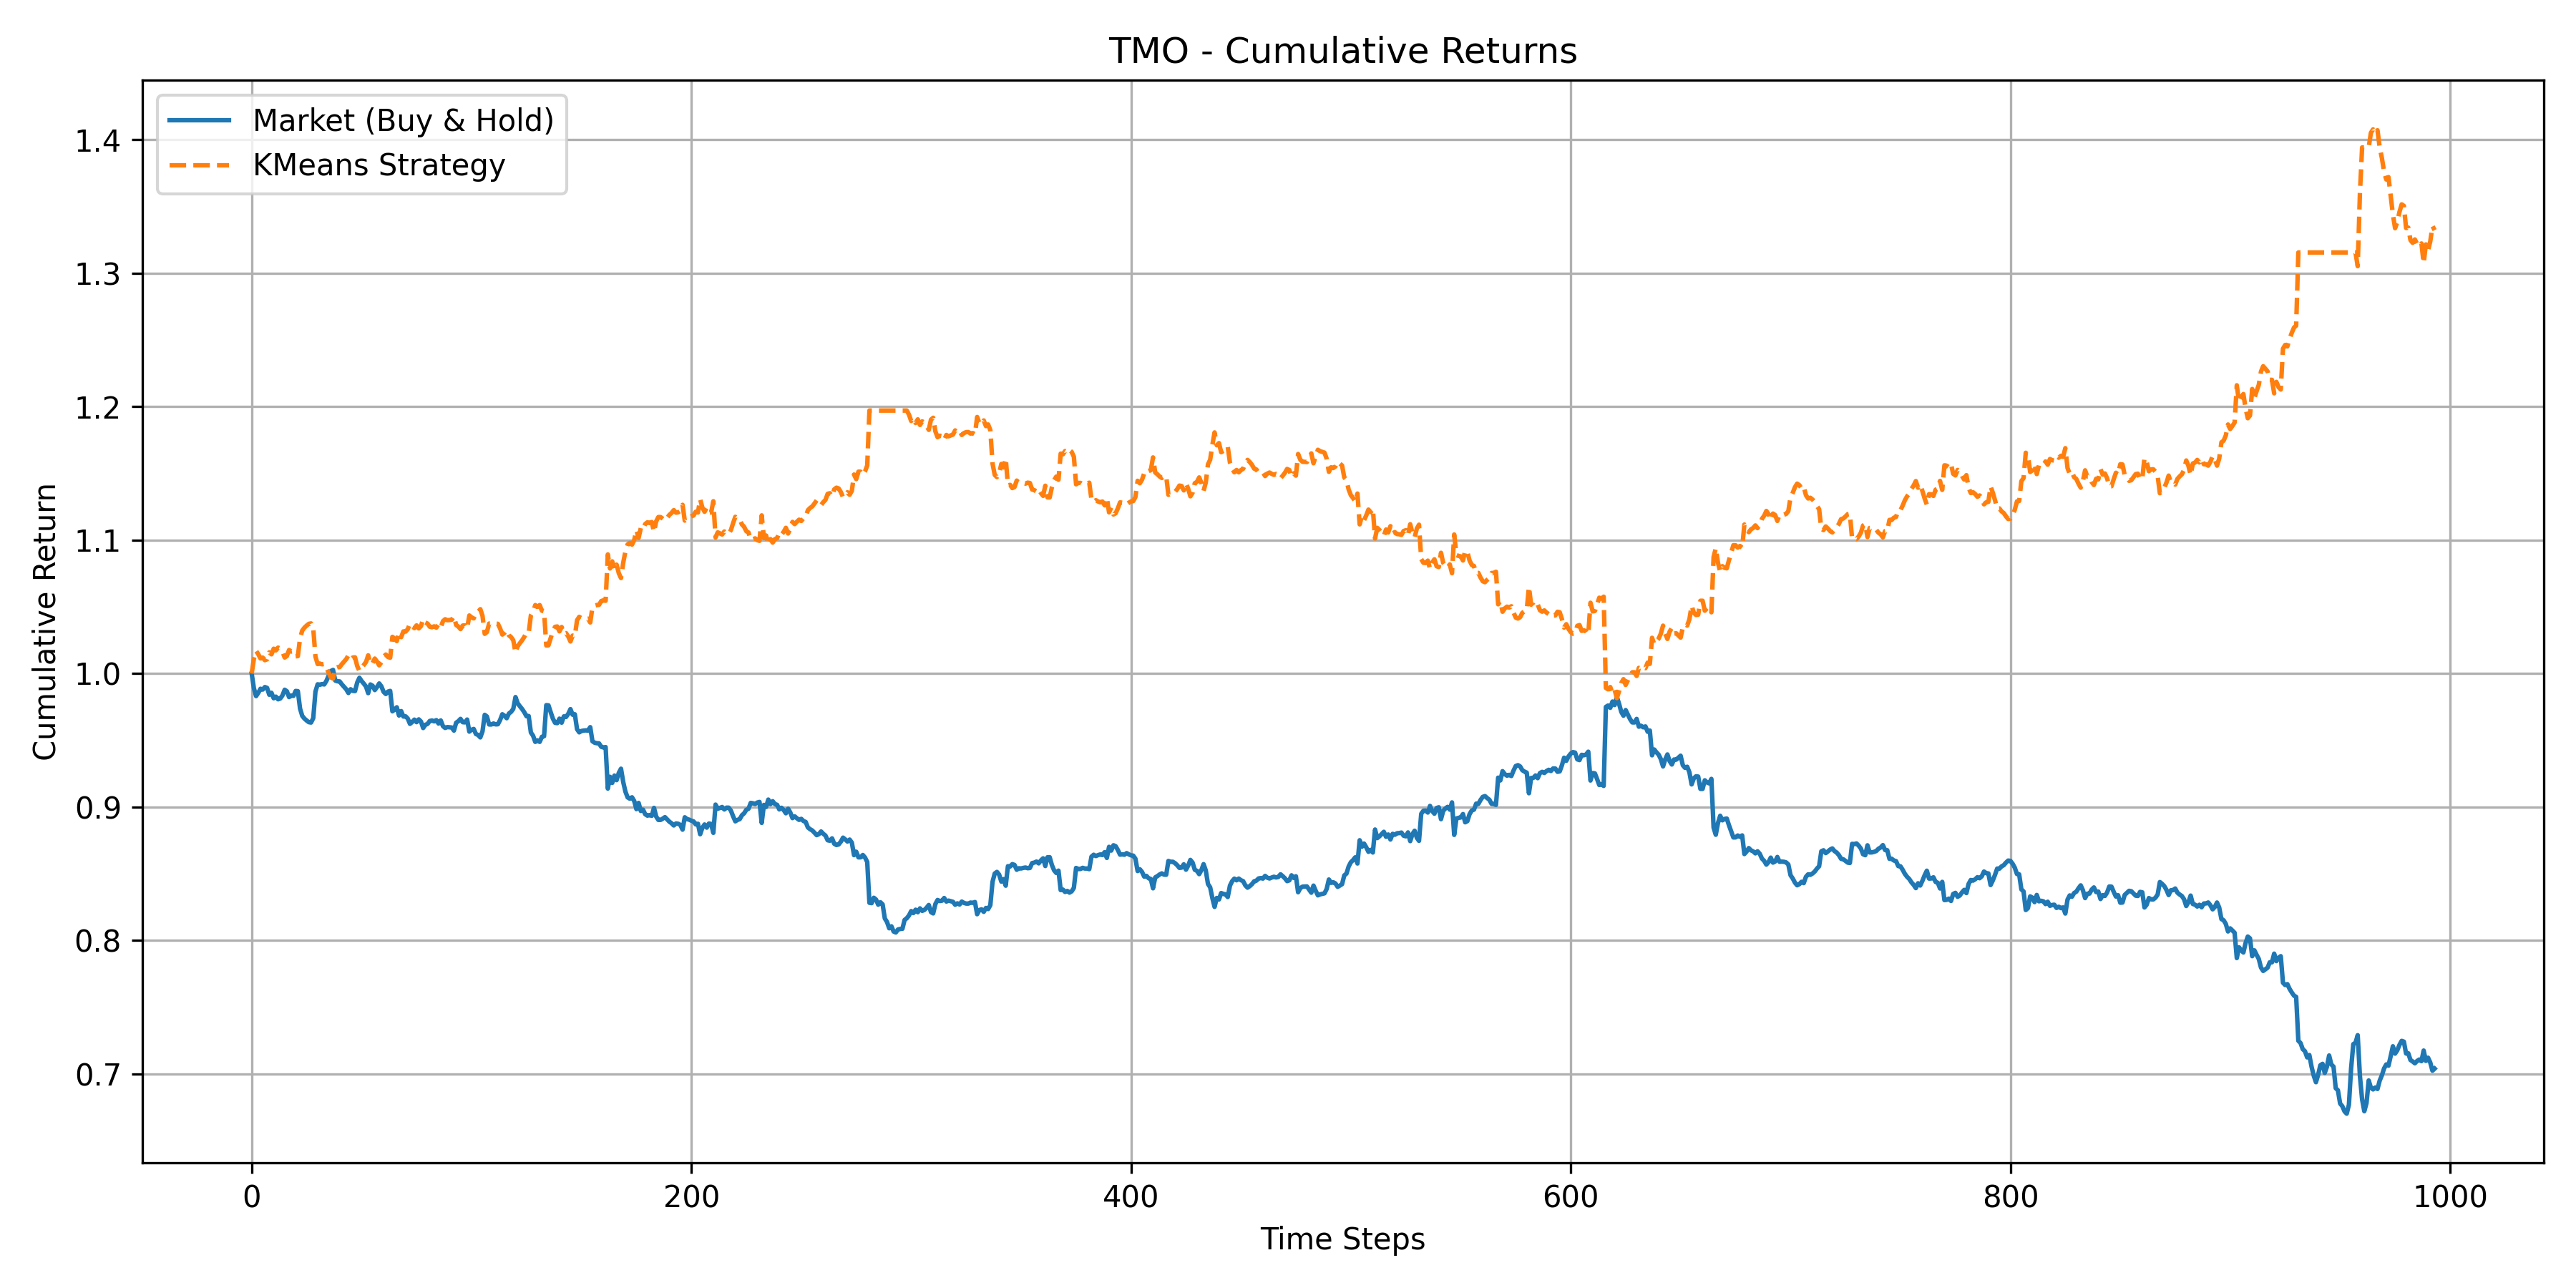

📈 MRK


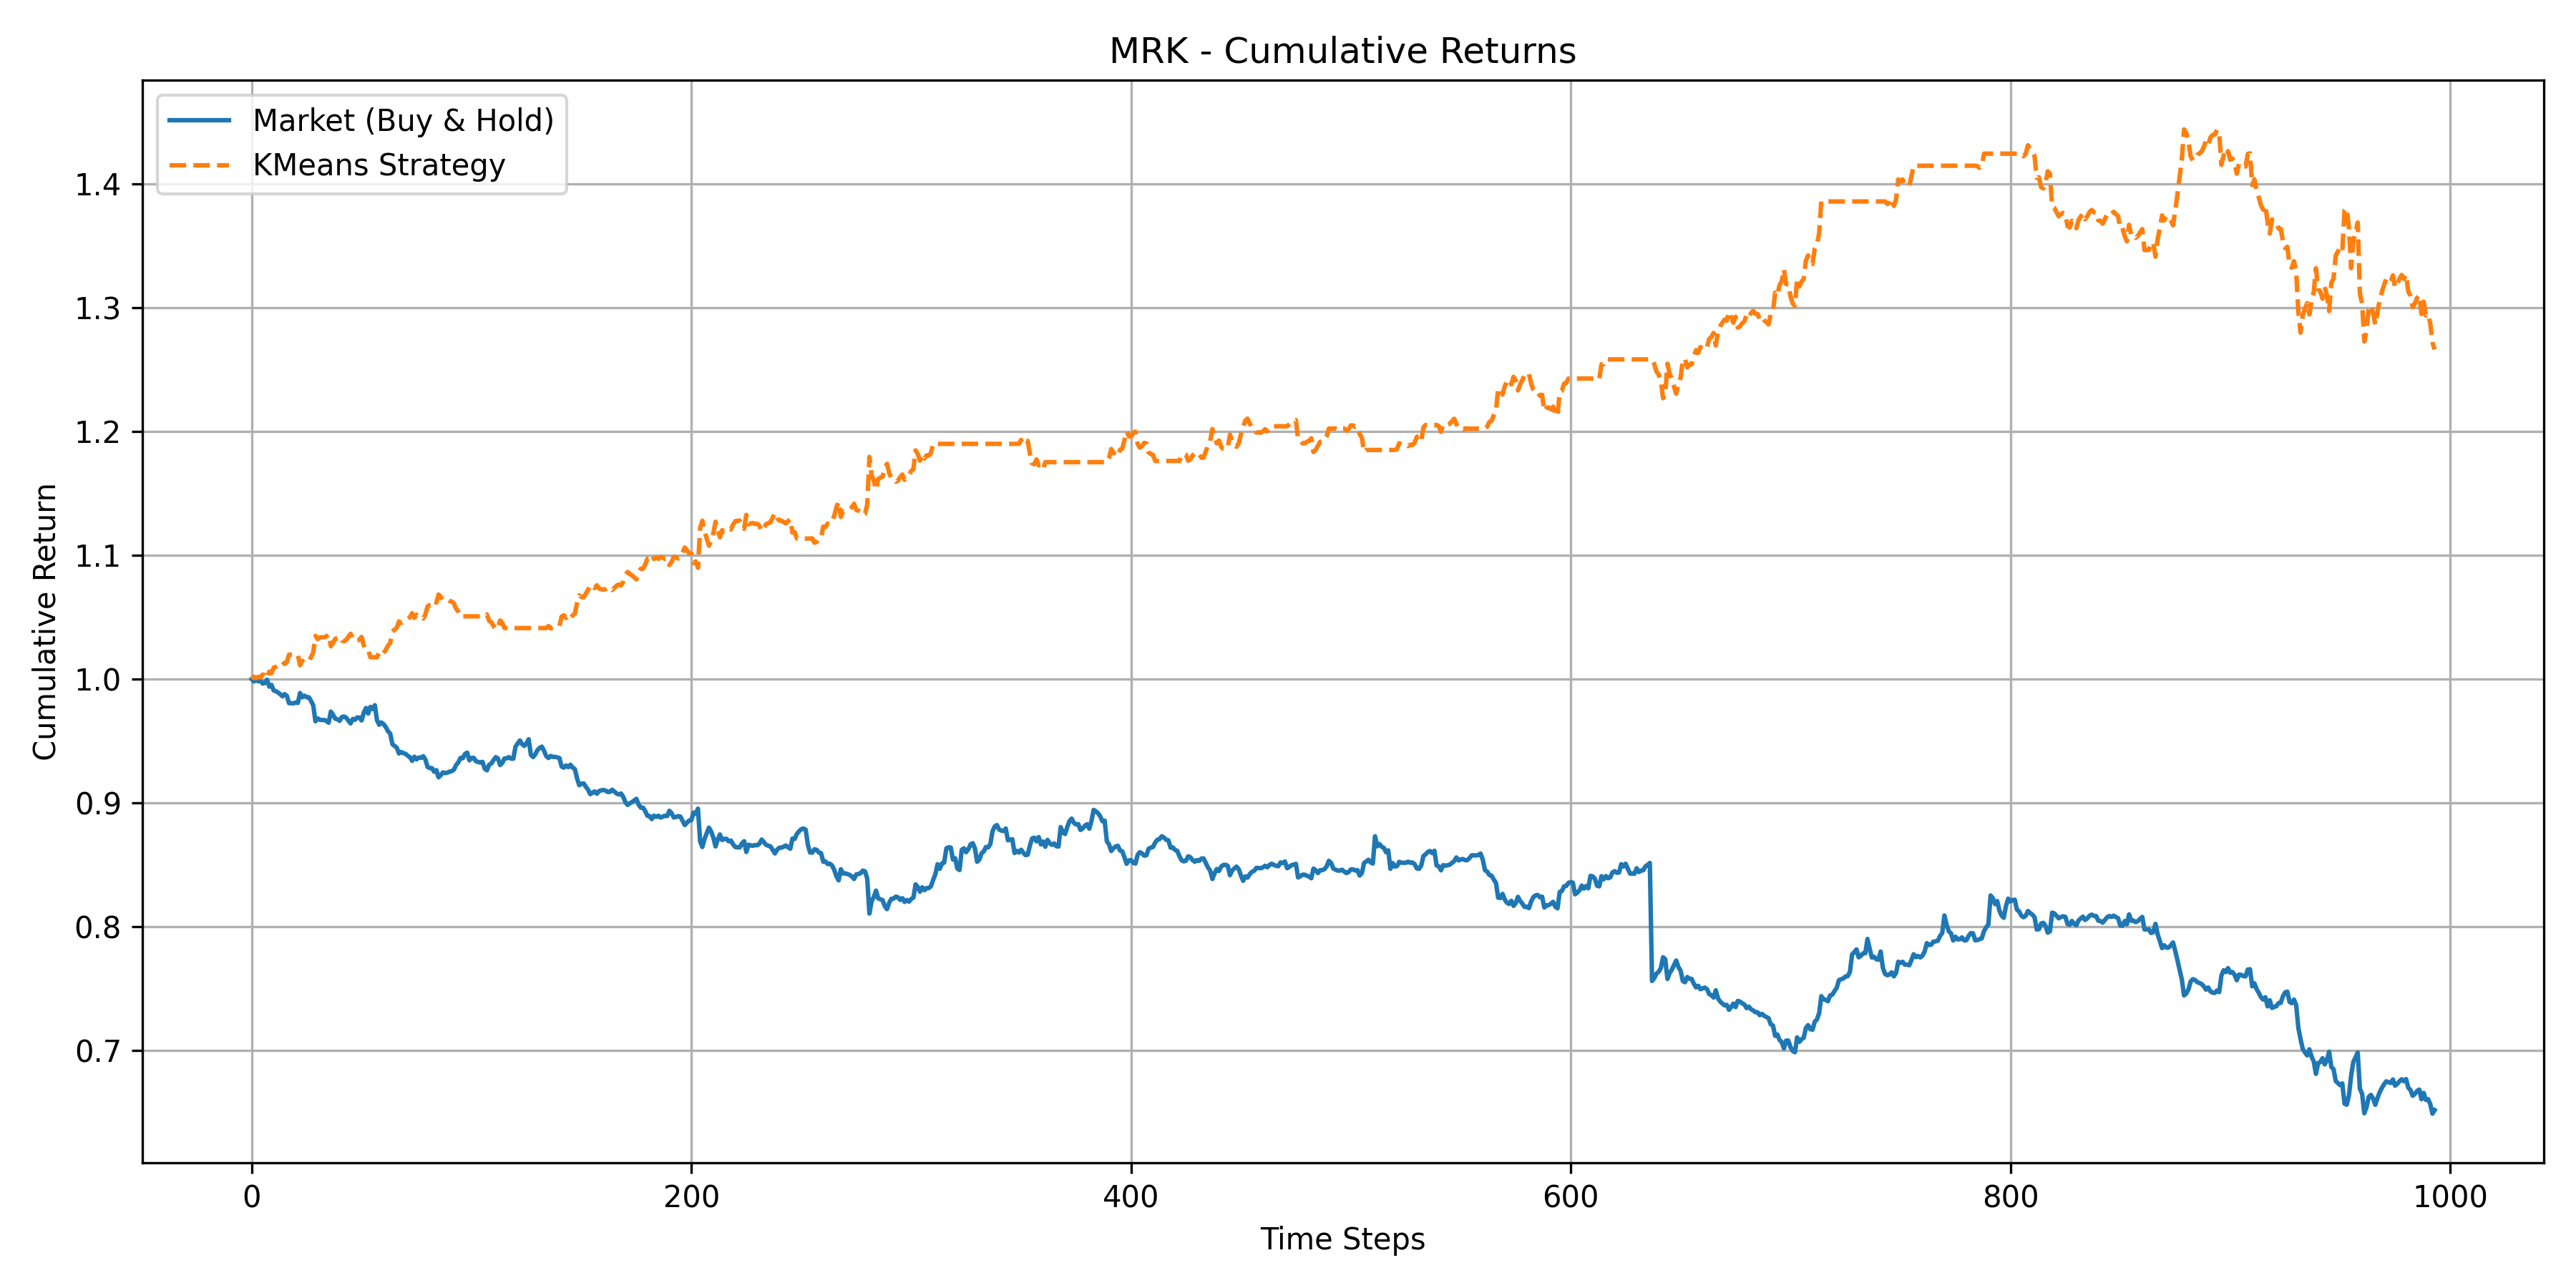

📈 QCOM


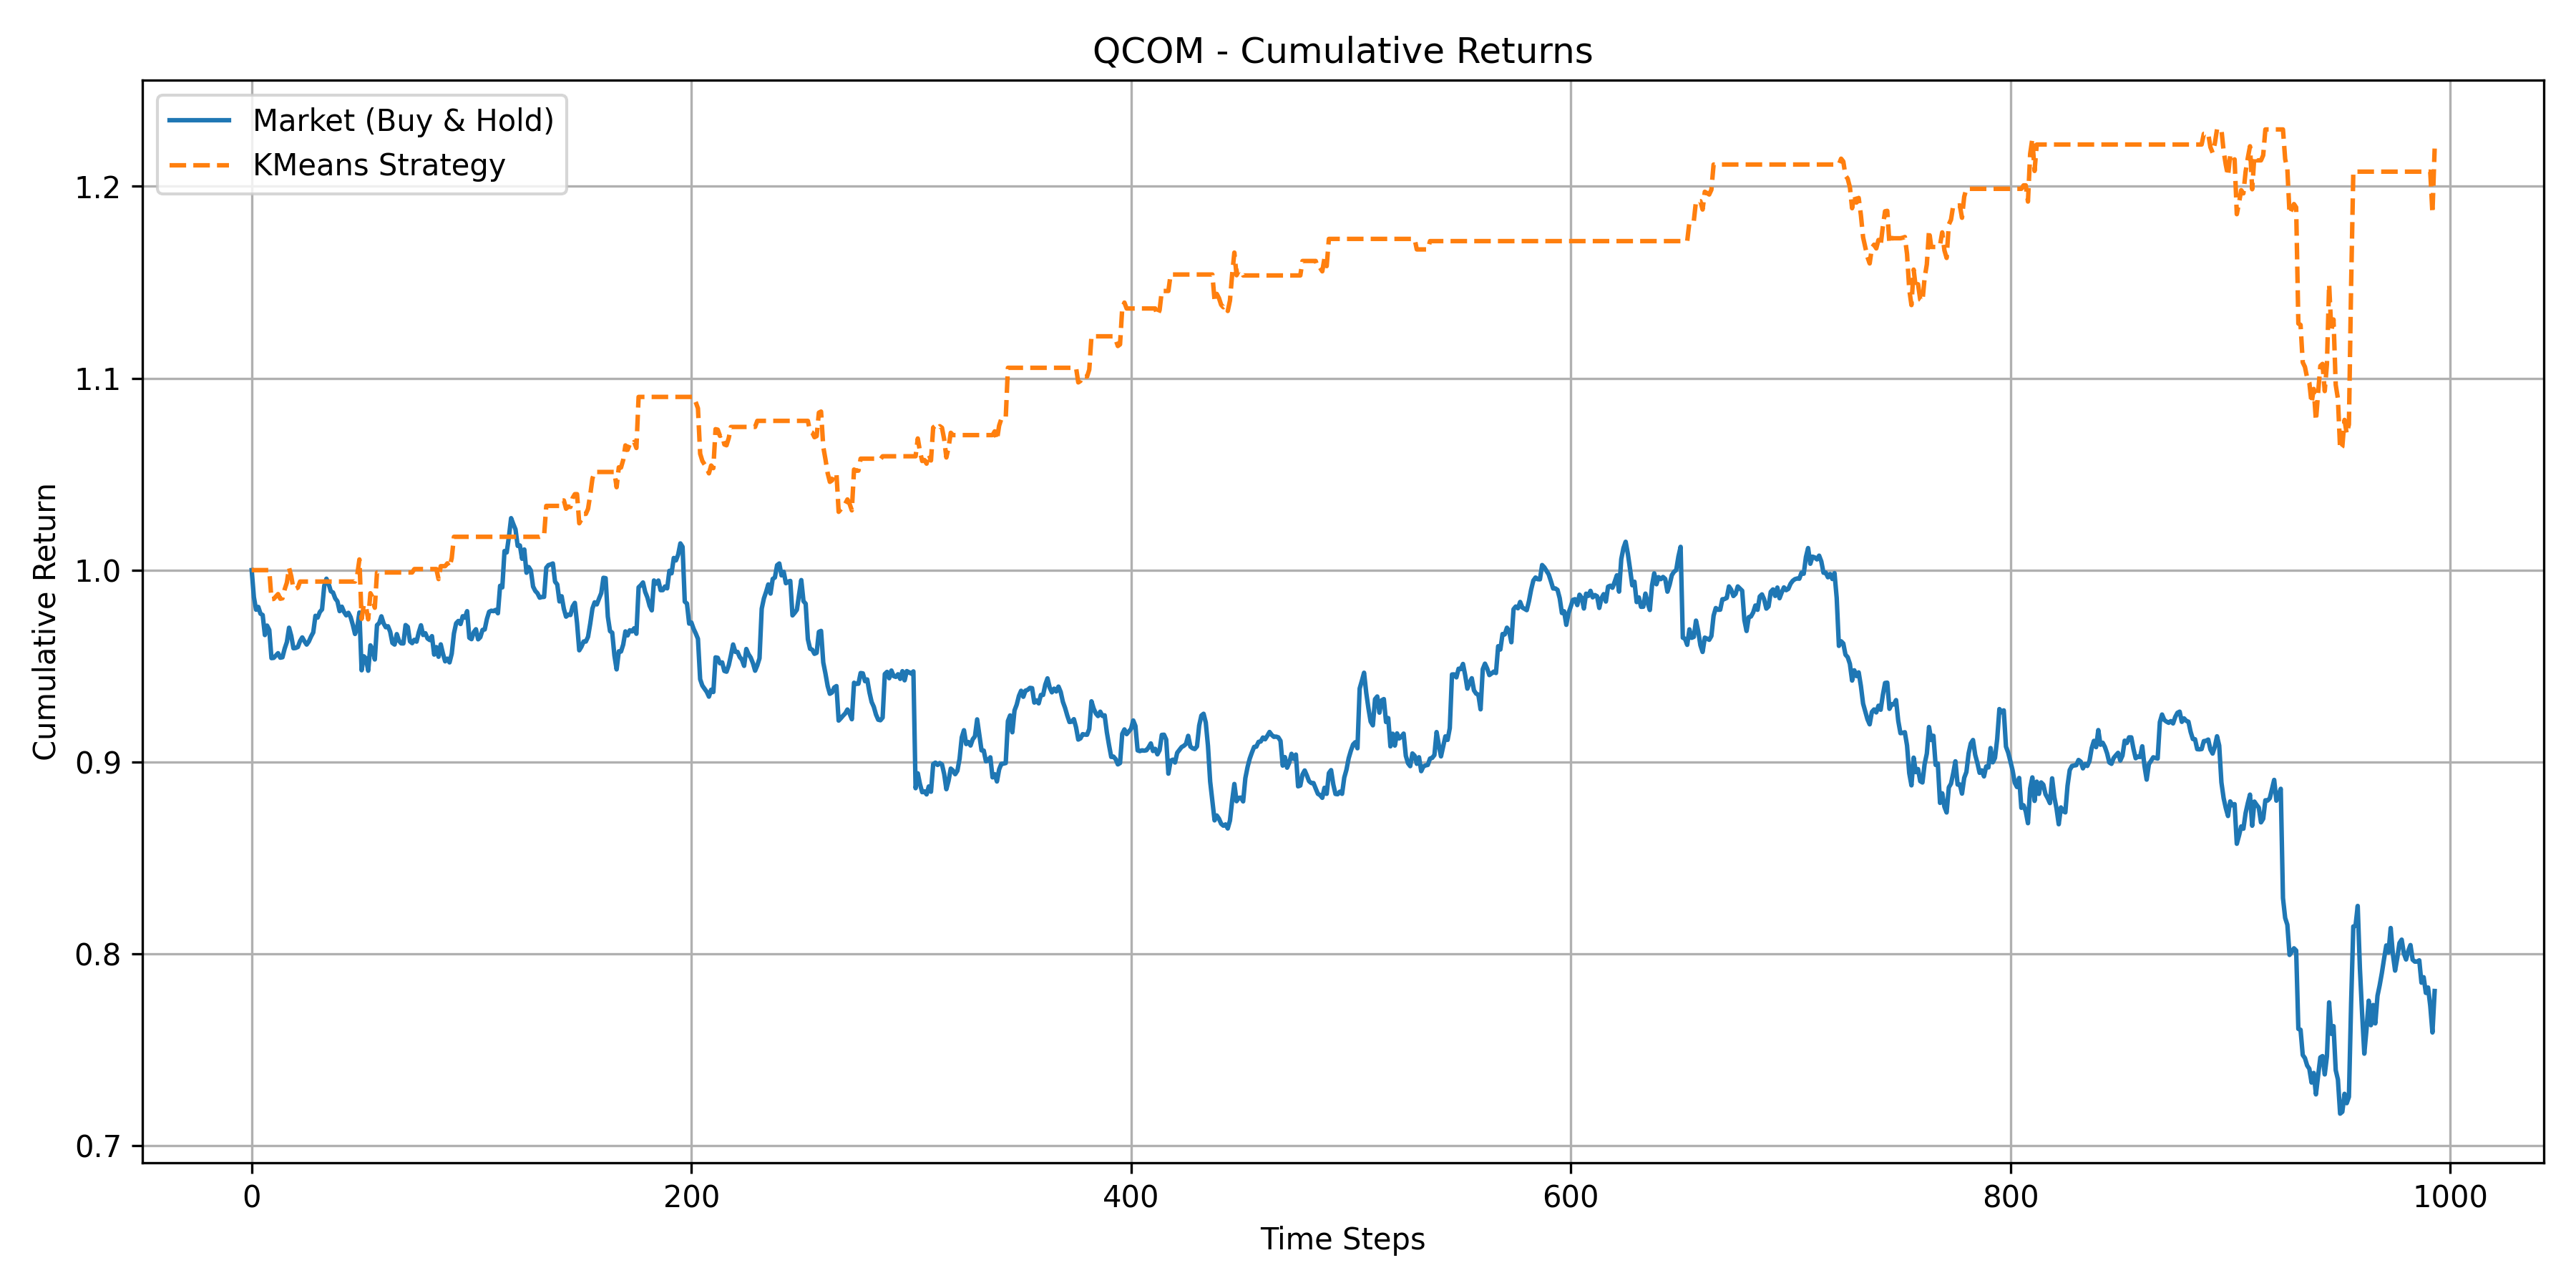

📈 TSLA


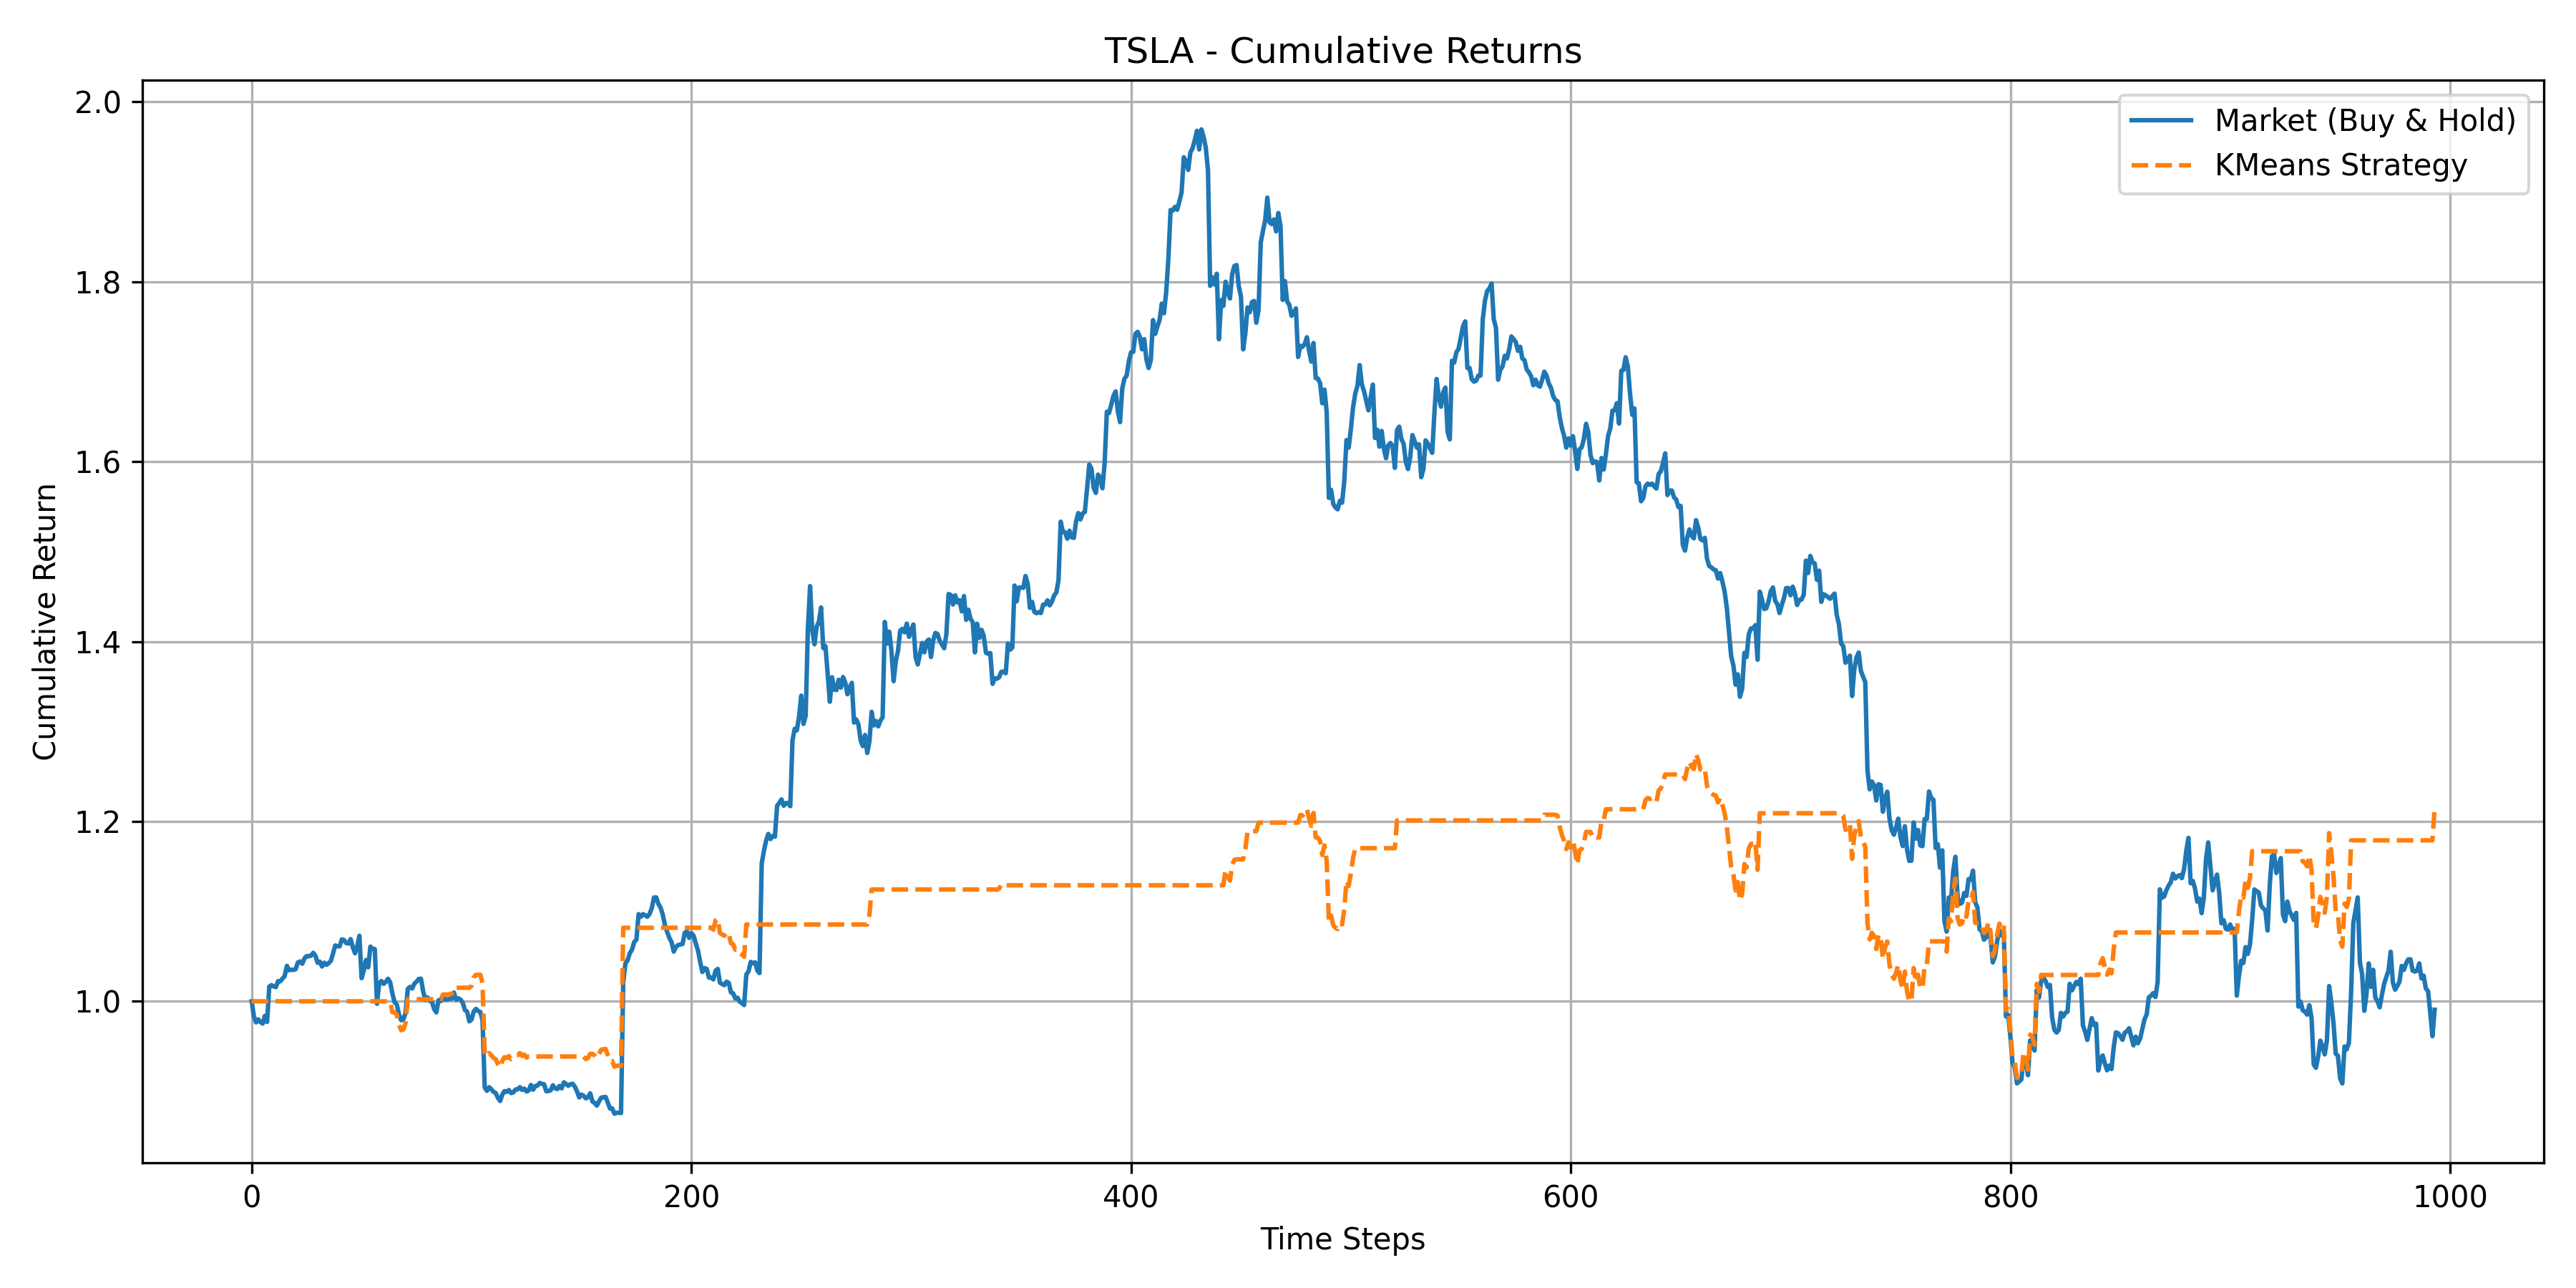

📈 AVGO


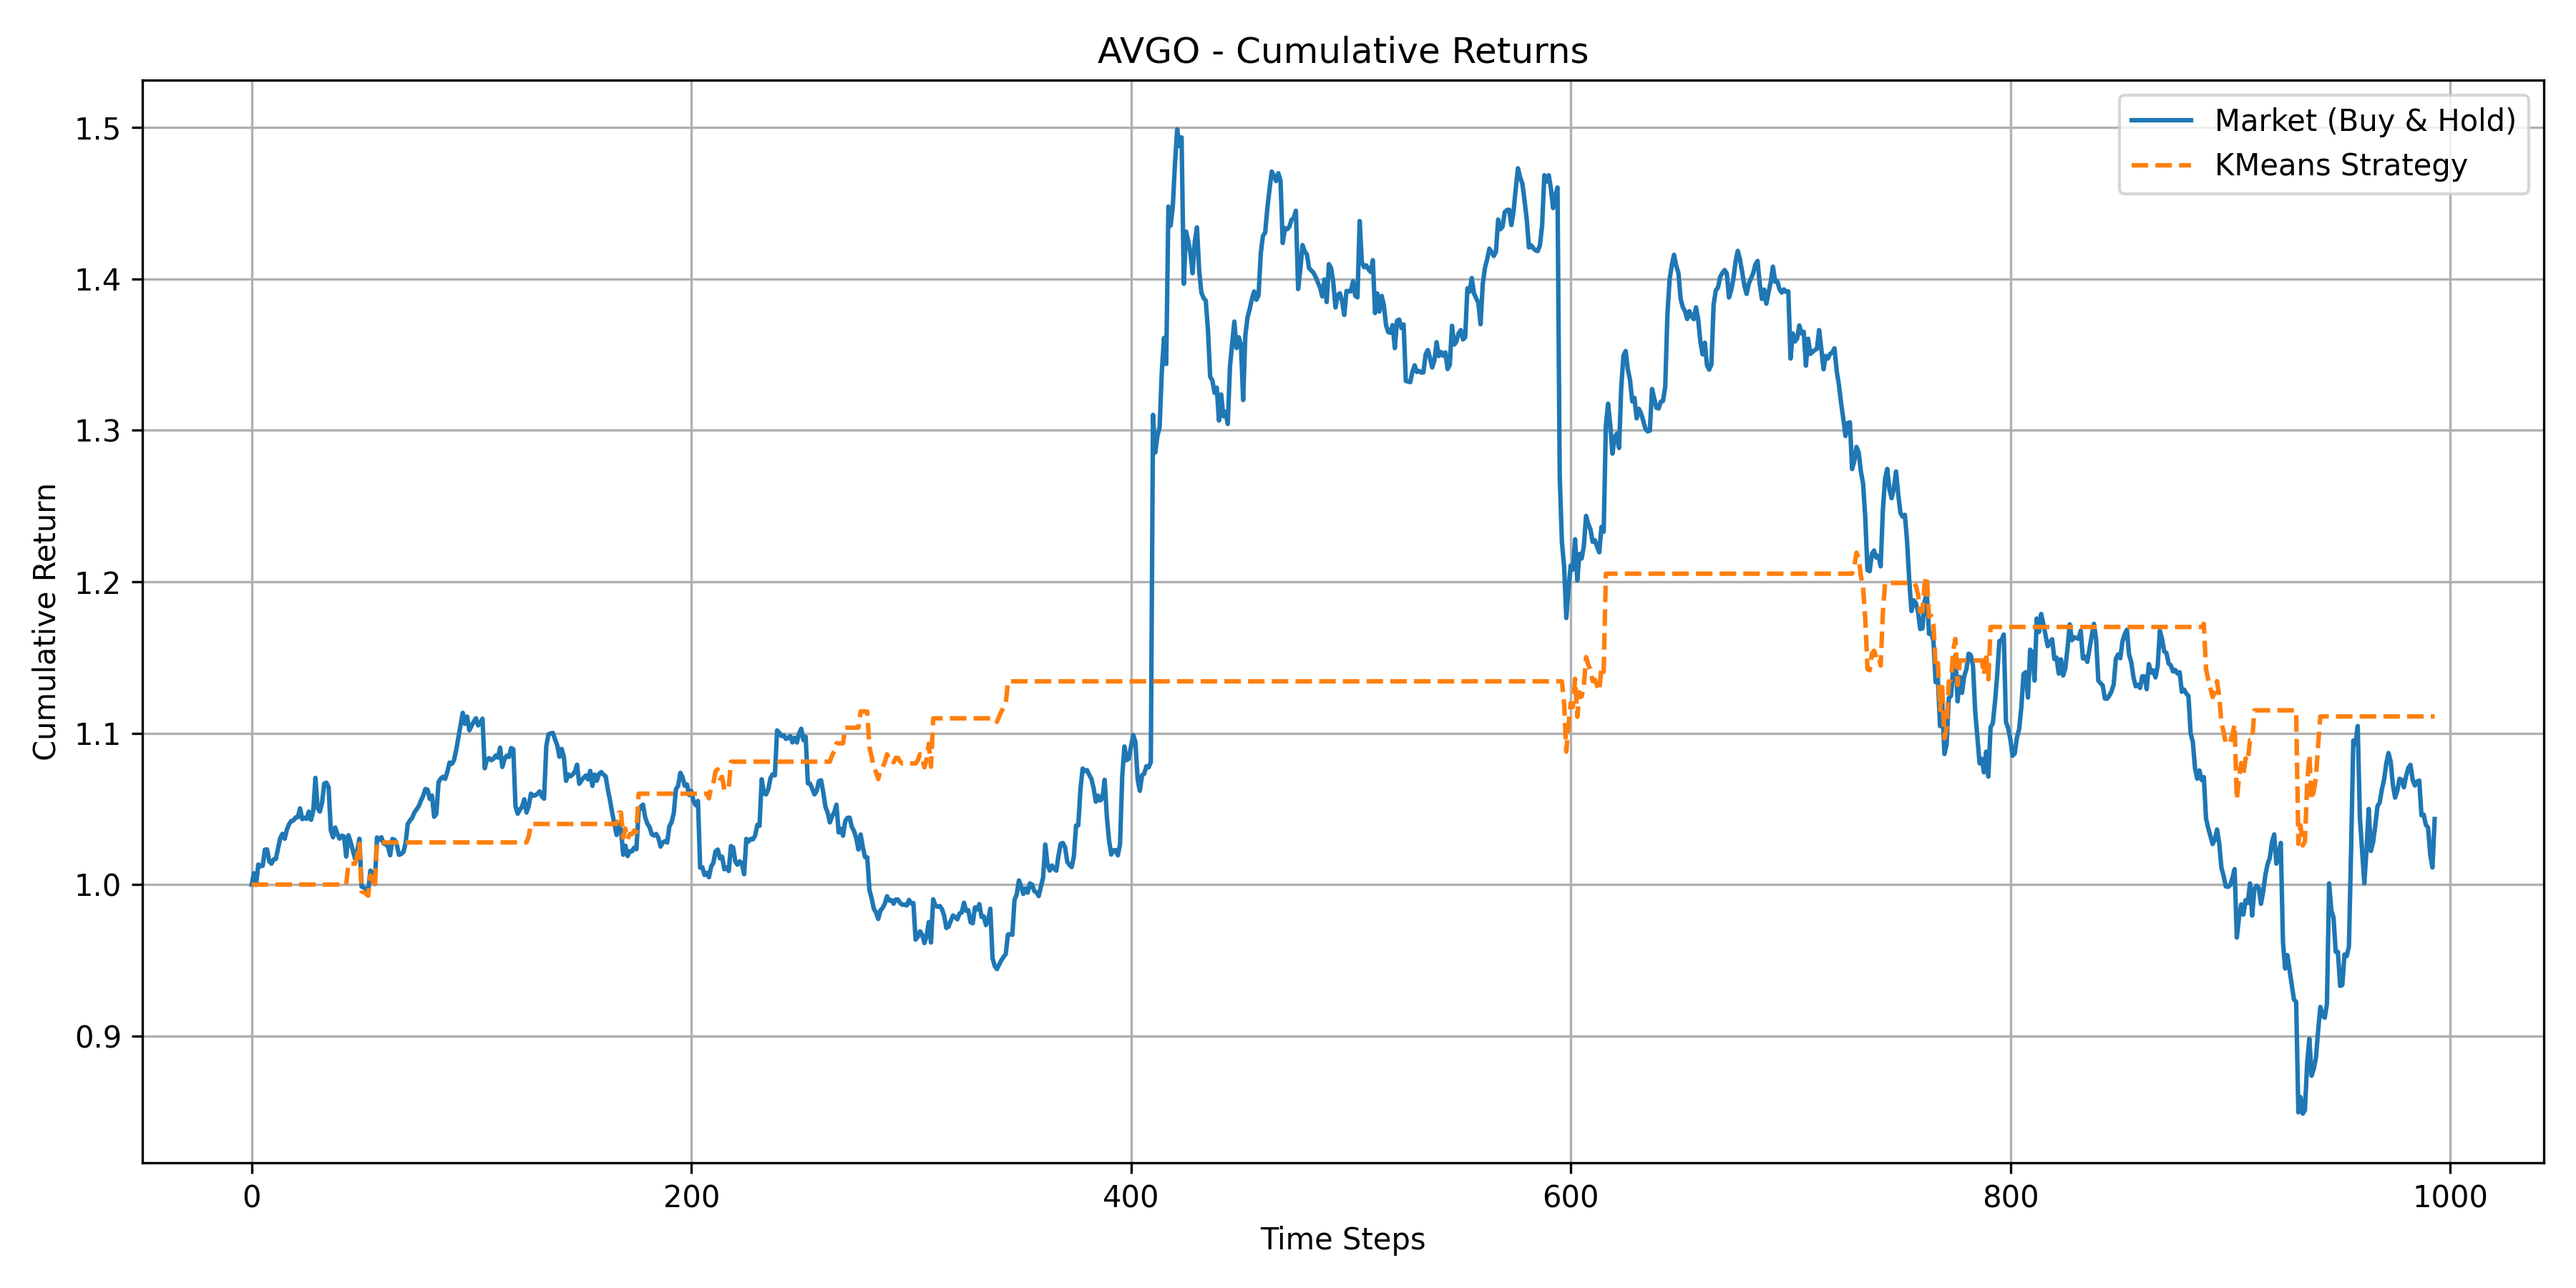

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

# ✅ Load summary (check both possible paths)
summary_path = (
    "results/kmeans_walkforward/summary_forward_return_remap.csv"
    if os.path.exists("results/kmeans_walkforward/summary_forward_return_remap.csv")
    else "results/kmeans_walkforward/summary.csv"
)
summary_df = pd.read_csv(summary_path)

# ✅ Ensure plot output directory exists
os.makedirs("results/kmeans_walkforward/plots", exist_ok=True)

# ✅ Top 5 tickers by strategy performance
top_tickers = summary_df.sort_values('Final Strategy', ascending=False).head(5)['Ticker']

for ticker in top_tickers:
    file_path = f"results/kmeans_walkforward/data/{ticker}_result.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        # ✅ Plot
        plt.figure(figsize=(12, 6))
        plt.plot(df['cumulative_market'], label='Market (Buy & Hold)', linestyle='-')
        plt.plot(df['cumulative_strategy'], label='KMeans Strategy', linestyle='--')
        plt.title(f"{ticker} - Cumulative Returns")
        plt.xlabel("Time Steps")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # ✅ Save plot
        plot_path = f"results/kmeans_walkforward/plots/{ticker}_portfolio_plot.png"
        plt.savefig(plot_path, dpi=300)
        plt.show()
        plt.close()
        print(f"✅ Plot saved for {ticker}: {plot_path}")
    else:
        print(f"⚠️ Result CSV not found for {ticker}: {file_path}")

# ✅ Inline display of saved plots
for ticker in top_tickers:
    img_path = f"results/kmeans_walkforward/plots/{ticker}_portfolio_plot.png"
    if os.path.exists(img_path):
        print(f"📈 {ticker}")
        display(Image(filename=img_path))


In [ ]:
import os
import joblib
import json
import pandas as pd

def save_kmeans_results(
    stock,
    model,
    result_df,
    final_portfolio_value,
    kmeans_sharpe,
    kmeans_drawdown,
    signal_map,
    directory="results/kmeans_walkforward"
):
    os.makedirs(f"{directory}/models", exist_ok=True)
    os.makedirs(f"{directory}/data", exist_ok=True)
    os.makedirs(f"{directory}/signals", exist_ok=True)

    # Save the model
    model_path = f"{directory}/models/{stock}_kmeans_model.pkl"
    joblib.dump(model, model_path)

    # Save the result DataFrame
    result_df.to_csv(f"{directory}/data/{stock}_result.csv", index=False)

    # Save the signal map as JSON
    with open(f"{directory}/signals/{stock}_signal_map.json", "w") as f:
        json.dump(signal_map, f, indent=4)

    # Append summary (optional — example only)
    summary_row = {
        "Ticker": stock,
        "Final Portfolio Value": final_portfolio_value,
        "Sharpe": kmeans_sharpe,
        "Drawdown": kmeans_drawdown
    }

    summary_path = f"{directory}/summary_kmeans_saved.csv"
    if os.path.exists(summary_path):
        summary_df = pd.read_csv(summary_path)
        summary_df = summary_df[summary_df["Ticker"] != stock]  # avoid duplicates
        summary_df = pd.concat([summary_df, pd.DataFrame([summary_row])], ignore_index=True)
    else:
        summary_df = pd.DataFrame([summary_row])

    summary_df.to_csv(summary_path, index=False)
    print(f"✅ Saved KMeans model and results for {stock}")
